## Data Collection

In [97]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import learning_curve

# Create synthetic dataset
X, y = make_classification(n_samples=300, n_features=10, n_classes=2, random_state=42)

# Convert to DataFrame
df = pd.DataFrame(X, columns=[f'Feature_{i}' for i in range(X.shape[1])])
df['Target'] = y

# Confirm the Data records are up to 300
num_rows_X = X.shape[0]
print(f"Total number of Data records: {num_rows_X}")

# Display the first few rows of the dataset
df.head()

Total number of Data records: 300


,Feature_0,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Target
0,-0.025435,1.452468,-1.203192,1.248099,-0.508140,0.923225,0.300474,-0.453248,-0.147780,0.326745,1
1,0.749972,0.097983,0.663984,-0.679773,0.253740,-0.338745,-0.391649,1.085786,0.467693,0.308051,0
2,-1.235592,-0.839210,-0.903206,0.922051,0.538296,0.410811,-1.966357,-0.364953,1.072507,-1.044809,1
3,-1.614818,-0.755745,-0.721757,0.729149,-0.668090,0.182711,-0.898468,-0.174960,0.992042,0.536510,1
4,-0.723893,0.632932,0.952203,-0.996834,-0.832356,-0.903253,-1.515744,-0.552223,0.471416,0.202923,0


## Data Preprocessing

In [99]:
# Handle missing values, outliers, and duplicates
df = df.dropna()  # Remove missing values
df = df.drop_duplicates()  # Remove duplicates

# Split dataset into training and testing sets
X = df.drop('Target', axis=1)
y = df['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Model Selection and Training

In [101]:
# Initialize logistic regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

LogisticRegression()

## Model Evaluation for Optimization

In [103]:
# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[27  2]
 [ 2 29]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        29
           1       0.94      0.94      0.94        31

    accuracy                           0.93        60
   macro avg       0.93      0.93      0.93        60
weighted avg       0.93      0.93      0.93        60



This is a classification report from the Logistic Regression Model, which includes a confusion matrix and performance metrics such as precision, recall, and F1-score.

High Precision and Recall: Both classes have high precision and recall values (0.93 and 0.94), indicating that the model performs well in identifying both classes.

Balanced Performance: The F1-scores are also high, suggesting a balanced performance between precision and recall.

Overall Accuracy: The accuracy of 0.93 indicates that the model is performing well in terms of correctly classifying instances.

## Plotting Learning Curve

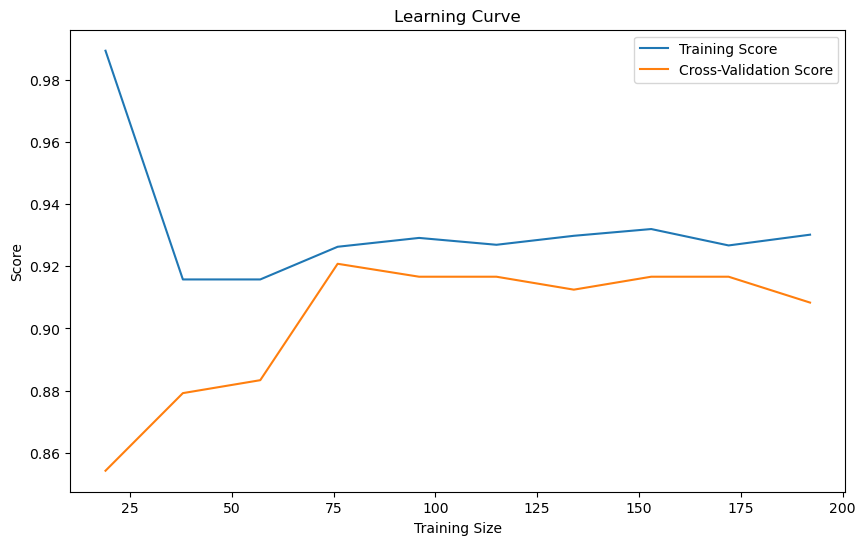

In [105]:
# Compute learning curve
train_sizes, train_scores, test_scores = learning_curve(
    model, X_train, y_train, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
)

# Plot learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores.mean(axis=1), label='Training Score')
plt.plot(train_sizes, test_scores.mean(axis=1), label='Cross-Validation Score')
plt.xlabel('Training Size')
plt.ylabel('Score')
plt.title('Learning Curve')
plt.legend()
plt.show()

### Analysis
The learning curve demonstrates that the model initially overfits when trained on a small dataset, as indicated by the high training score (around 0.98) and the significantly lower cross-validation score (around 0.85). However, as the training size increases, the gap between the training and cross-validation scores narrows, with both stabilizing at approximately 0.92 after around 75 samples. This indicates that the model generalizes better with more data and achieves strong performance with reduced overfitting. Beyond 150 samples, the curve plateaus, suggesting that further increasing the dataset size may yield diminishing returns in improving the model's accuracy. Overall, the model is well-balanced with minimal bias and variance, performing consistently across both training and unseen data.